In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
episodes_df = pd.read_csv('breaking_bad_episodes.csv',
                          parse_dates=['original_air_date'])
imdb_df = pd.read_csv('breaking_bad_imdb.csv',
                      parse_dates=['original_air_date'])

In [29]:
episodes_df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Vince Gilligan,Vince Gilligan,2008-01-20,1410000.0
1,1,2,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,2008-01-27,1490000.0
2,1,3,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,2008-02-10,1080000.0
3,1,4,4,Cancer Man,Jim McKay,Vince Gilligan,2008-02-17,1090000.0
4,1,5,5,Gray Matter,Tricia Brock,Patty Lin,2008-02-24,970000.0


In [30]:
episodes_df.min() 

season                                               1
episode_num_in_season                                1
episode_num_overall                                  1
title                    ...And the Bag's in the River
directed_by                             Adam Bernstein
written_by                          Gennifer Hutchison
original_air_date                  2008-01-20 00:00:00
us_viewers                                    970000.0
dtype: object

In [31]:
imdb_df.min()

season                                                               1
episode_num                                                          1
title                                    ...And the Bag's in the River
original_air_date                                  2008-01-20 00:00:00
imdb_rating                                                        7.9
total_votes                                                      16545
desc                 After Skinny Pete gets ripped off, Walt makes ...
dtype: object

In [32]:
imdb_df = imdb_df[['title', 'original_air_date', 'imdb_rating', 'total_votes', 'desc']]

breaking_bad_df = episodes_df.merge(imdb_df, how='left', on=['title', 'original_air_date'])

breaking_bad_df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers,imdb_rating,total_votes,desc
0,1,1,1,Pilot,Vince Gilligan,Vince Gilligan,2008-01-20,1410000.0,9.1,30419,"Diagnosed with terminal lung cancer, chemistry..."
1,1,2,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,2008-01-27,1490000.0,8.7,22282,After their first drug deal goes terribly wron...
2,1,3,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,2008-02-10,1080000.0,8.8,21633,Walt and Jesse clean up after the bathtub inci...
3,1,4,4,Cancer Man,Jim McKay,Vince Gilligan,2008-02-17,1090000.0,8.3,20912,Walt tells the rest of his family about his ca...
4,1,5,5,Gray Matter,Tricia Brock,Patty Lin,2008-02-24,970000.0,8.4,20546,Walt rejects everyone who tries to help him wi...


Scatter Plot Showing 

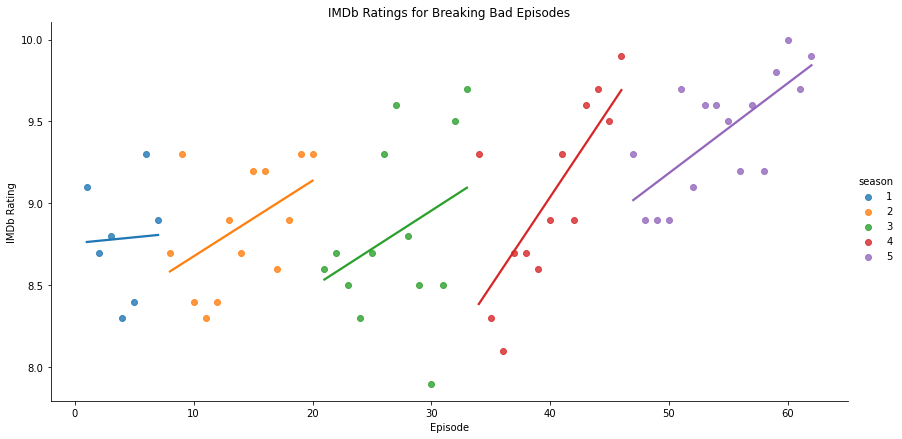

In [33]:
sns.lmplot(x="episode_num_overall", y="imdb_rating", hue="season", data=breaking_bad_df, height=6, aspect=2, ci=None)
plt.xlabel("Episode")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings for Breaking Bad Episodes");

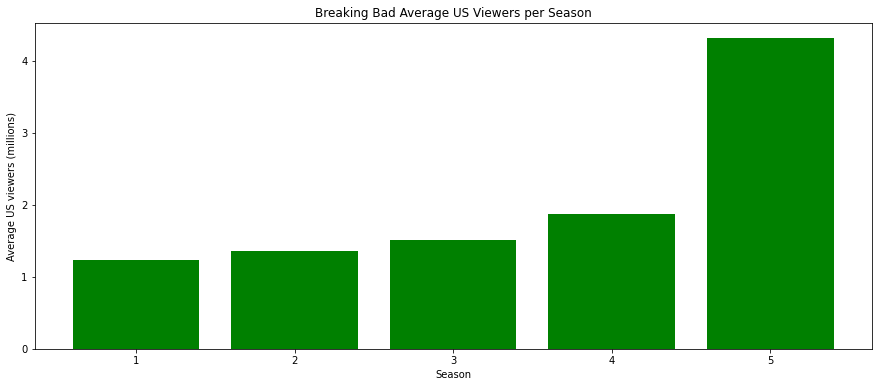

In [35]:
mean_viewers = breaking_bad_df.groupby(['season'])['us_viewers'].mean()

fig = plt.figure(figsize=(15, 6))

plt.bar(x=mean_viewers.index, height=(mean_viewers.values / 1e6), color='green')
plt.ylabel('Average US viewers (millions)')
plt.xlabel('Season')
plt.title('Breaking Bad Average US Viewers per Season');

In [37]:
episodes_df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Vince Gilligan,Vince Gilligan,2008-01-20,1410000.0
1,1,2,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,2008-01-27,1490000.0
2,1,3,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,2008-02-10,1080000.0
3,1,4,4,Cancer Man,Jim McKay,Vince Gilligan,2008-02-17,1090000.0
4,1,5,5,Gray Matter,Tricia Brock,Patty Lin,2008-02-24,970000.0


In [38]:
imdb_df.head()

,title,original_air_date,imdb_rating,total_votes,desc
0,Pilot,2008-01-20,9.1,30419,"Diagnosed with terminal lung cancer, chemistry..."
1,Cat's in the Bag...,2008-01-27,8.7,22282,After their first drug deal goes terribly wron...
2,...And the Bag's in the River,2008-02-10,8.8,21633,Walt and Jesse clean up after the bathtub inci...
3,Cancer Man,2008-02-17,8.3,20912,Walt tells the rest of his family about his ca...
4,Gray Matter,2008-02-24,8.4,20546,Walt rejects everyone who tries to help him wi...


In [40]:
lowest_rating_row = imdb_df['imdb_rating'].idxmin()
print(lowest_rating_row)

29


In [41]:
print(imdb_df.iloc[29])

title                                                              Fly
original_air_date                                  2010-05-23 00:00:00
imdb_rating                                                        7.9
total_votes                                                      29233
desc                 There is a fly loose in the lab. Walt and Jess...
Name: 29, dtype: object


In [42]:
highest_rating_row = imdb_df['imdb_rating'].idxmax()
print(highest_rating_row)

59


In [43]:
print(imdb_df.iloc[59])

title                                                       Ozymandias
original_air_date                                  2013-09-15 00:00:00
imdb_rating                                                       10.0
total_votes                                                     150341
desc                 Walt goes on the run. Jesse is taken hostage. ...
Name: 59, dtype: object


In [44]:
episodes_df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Vince Gilligan,Vince Gilligan,2008-01-20,1410000.0
1,1,2,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,2008-01-27,1490000.0
2,1,3,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,2008-02-10,1080000.0
3,1,4,4,Cancer Man,Jim McKay,Vince Gilligan,2008-02-17,1090000.0
4,1,5,5,Gray Matter,Tricia Brock,Patty Lin,2008-02-24,970000.0


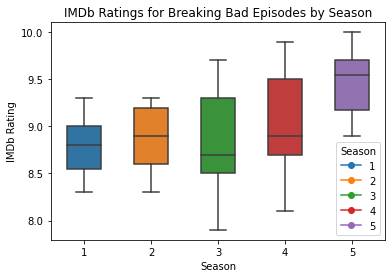

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot with wider boxes
sns.boxplot(x="season", y="imdb_rating", data=breaking_bad_df, width=0.5)

# Set the labels and title
plt.xlabel("Season")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings for Breaking Bad Episodes by Season")

# Create a new subplot for the legend
legend_handles = []
colors = sns.color_palette()
for i, season in enumerate(breaking_bad_df["season"].unique()):
    handle = plt.plot([], [], marker="o", color=colors[i], label=season)
    legend_handles.append(handle[0])
plt.legend(handles=legend_handles, title="Season")

# Show the plot
plt.show()